<a href="https://colab.research.google.com/github/ismailmetinipek/HW2/blob/main/HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile

In [2]:
zip_file = "banknote+authentication.zip"
with zipfile.ZipFile(zip_file, 'r') as z:
    z.extractall(".")      extracted_file = z.namelist()[0]  

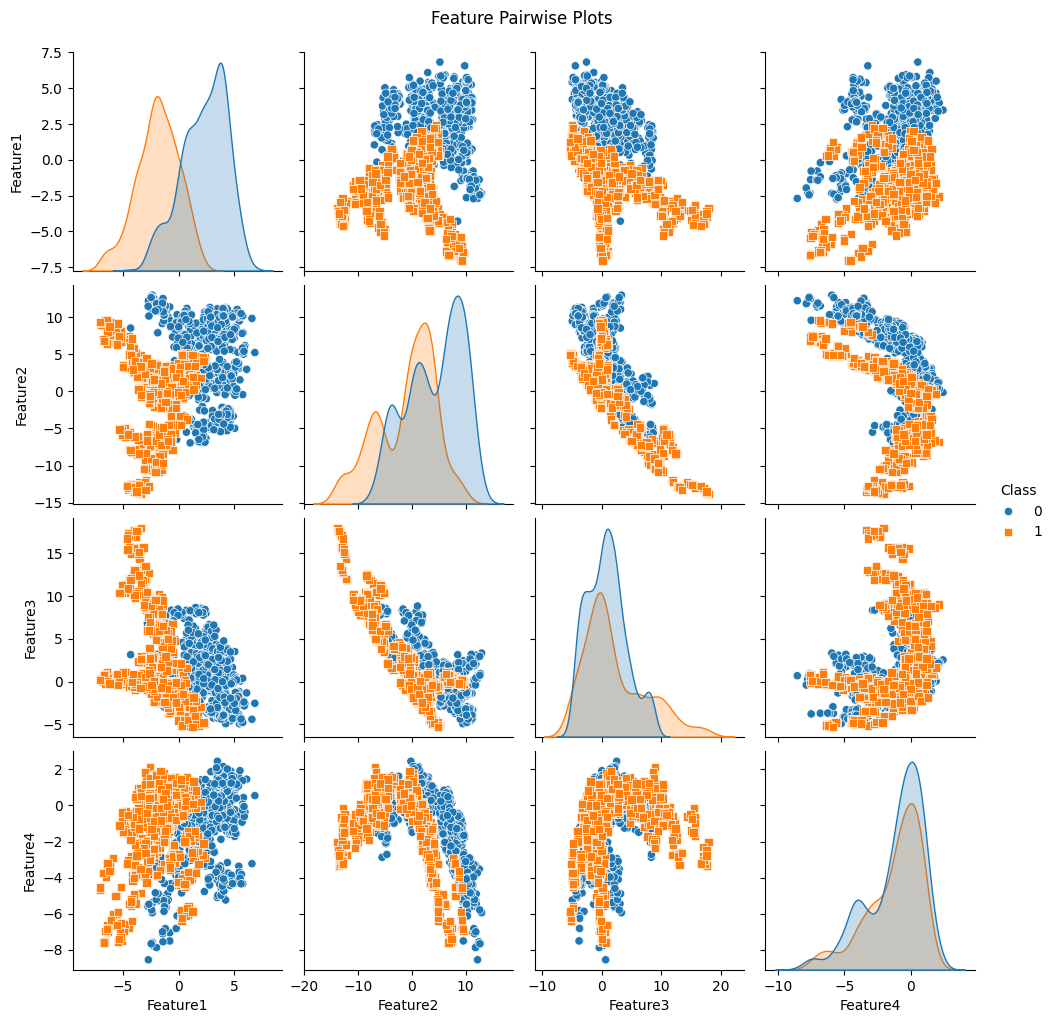

In [3]:
df = pd.read_csv(extracted_file, header=None)

# Assign meaningful column names
df.columns = ["Feature1", "Feature2", "Feature3", "Feature4", "Class"]

# Visualize feature distributions in pairs
sns.pairplot(df, hue="Class", diag_kind="kde", markers=["o", "s"])
plt.suptitle("Feature Pairwise Plots", y=1.02)
plt.show()

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, ConfusionMatrixDisplay

In [5]:
# Split the data into training (80%) and testing (20%) sets
X = df.drop(columns=["Class"])
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [6]:
# Train the Decision Tree model
clf = DecisionTreeClassifier(max_depth=5, min_samples_split=10, criterion="gini", random_state=42)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)

In [7]:
# Evaluate the model
y_pred = clf.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       153
           1       0.98      1.00      0.99       122

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



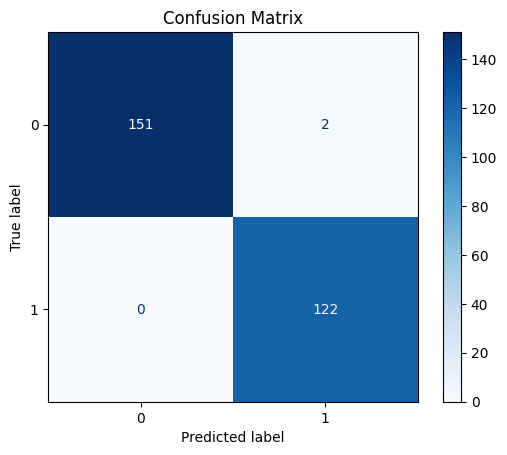

In [8]:
# Plot confusion matrix
ConfusionMatrixDisplay.from_estimator(clf, X_test, y_test, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

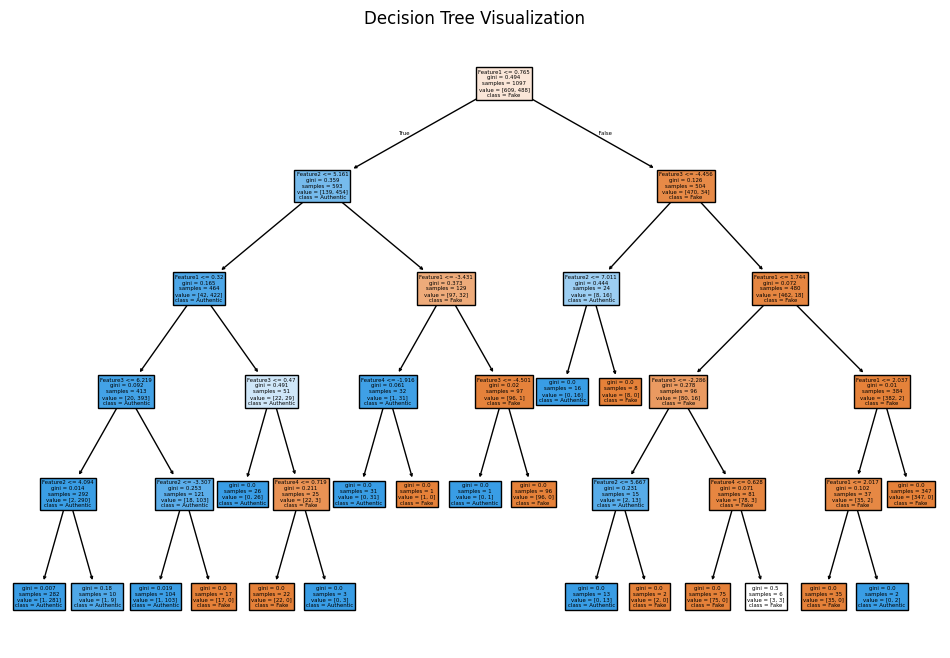

In [9]:
# Visualize the decision tree
plt.figure(figsize=(12, 8))
plot_tree(clf, feature_names=X.columns, class_names=["Fake", "Authentic"], filled=True)
plt.title("Decision Tree Visualization")
plt.show()

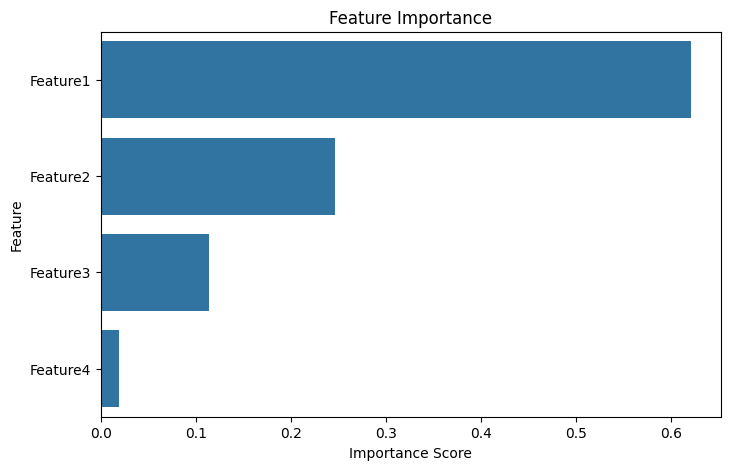

In [10]:
# Visualize feature importance
importances = clf.feature_importances_
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=X.columns)
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()